# Notebook contains adversarial examples generate on CIRAF-10

In [1]:
import sys, os
d = os.path.dirname(os.getcwd())
sys.path.insert(0, d)

In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms

from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt

from utils.attacks import fgsm, pgd
from utils.utils import plot_images
from utils.train_utils import eval_epoch
from models.resnet import ResNet, SparseResNet

1.7.0
True


In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [4]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

ds = CIFAR10('../data', train=False, target_transform=None, download=True, transform=test_transform)
test_loader = DataLoader(ds, 20, shuffle=True)
for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    break

Files already downloaded and verified


# Models trained on clean images

## Model ResNet

In [5]:
model = ResNet().to(device)
model.load_state_dict(torch.load("../saved/resnet.pt", map_location=device))

<All keys matched successfully>

**Predictions on clean pictures**

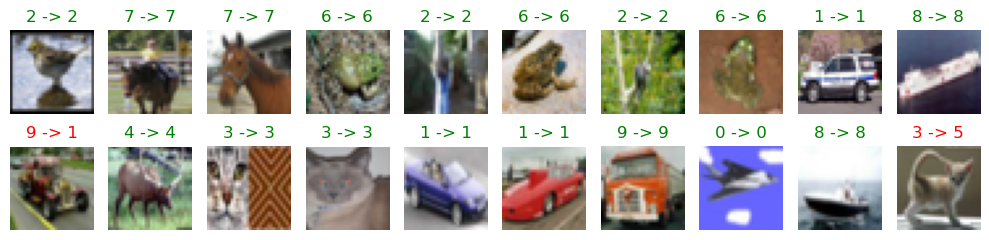

In [6]:
plot_images(X, y, model(X), 2, 10)

**Predictions on attacked images with PGD method**

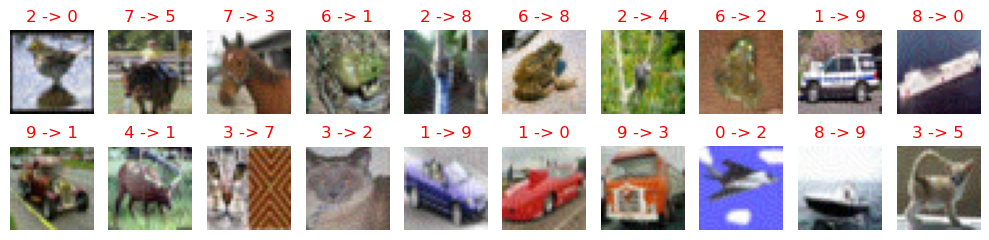

In [7]:
noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=8/255, alpha=2/255, num_iter=10)
adv_ex = X+noise
plot_images(adv_ex, y, model(adv_ex), 2, 10)

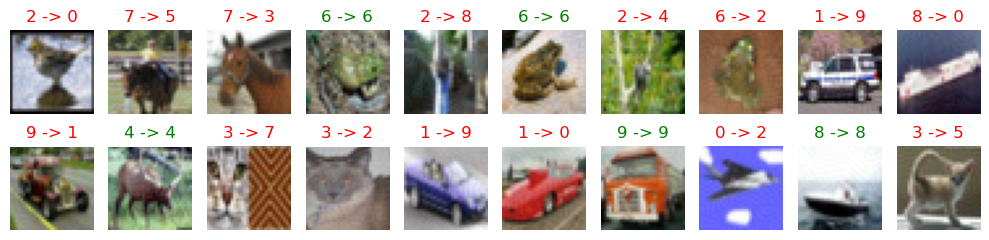

In [8]:
noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=4/255, alpha=2/255, num_iter=10)
adv_ex = X+noise
plot_images(adv_ex, y, model(adv_ex), 2, 10)

# Model SparseResNet

In [9]:
model = SparseResNet().to(device)
model.load_state_dict(torch.load("../saved/sparse_resnet.pt", map_location=device))

<All keys matched successfully>

**Predictions on clean pictures**

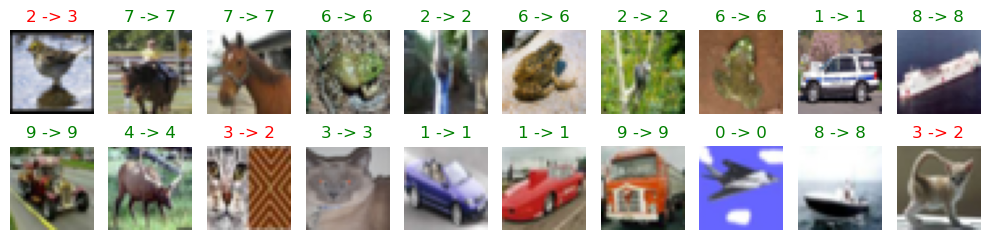

In [10]:
plot_images(X, y, model(X), 2, 10)

**Predictions on attacked images with PGD method**

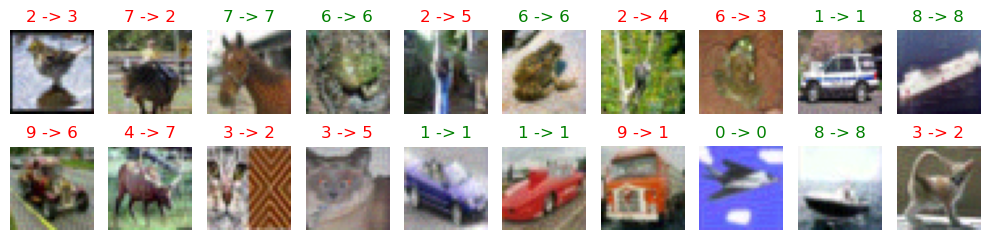

In [11]:
noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=8/255, alpha=2/255, num_iter=10)
adv_ex = X+noise
plot_images(adv_ex, y, model(adv_ex), 2, 10)

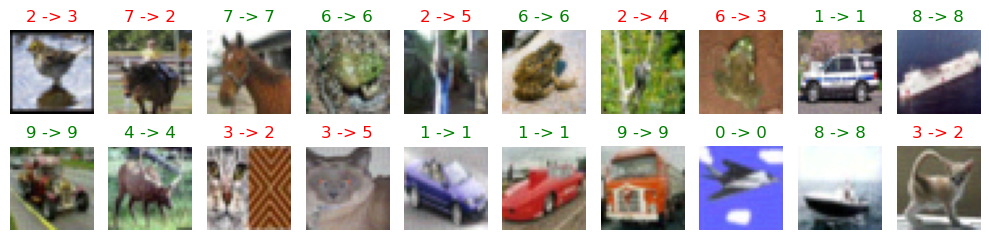

In [12]:
noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=4/255, alpha=2/255, num_iter=10)
adv_ex = X+noise
plot_images(adv_ex, y, model(adv_ex), 2, 10)

# Adversarial Training

## Robust ResNet

In [13]:
model = ResNet().to(device)
model.load_state_dict(torch.load("../saved/resnet_robust_eps8.pt", map_location=device))

<All keys matched successfully>

**Predictions on clean pictures**

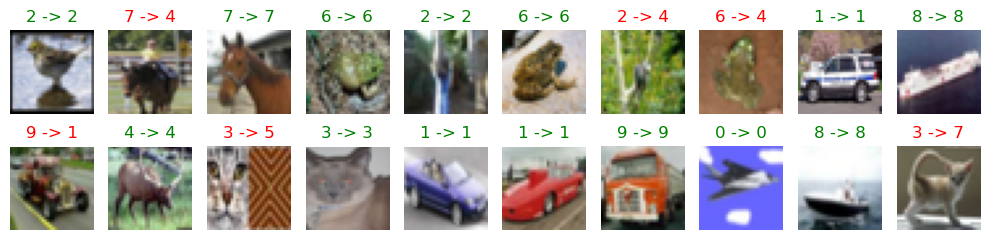

In [14]:
plot_images(X, y, model(X), 2, 10)

**Predictions on attacked images with PGD method**

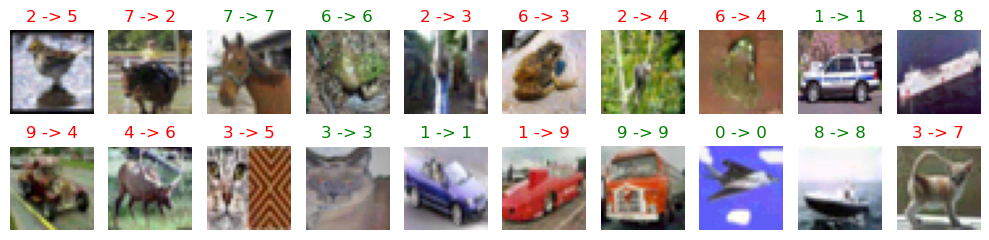

In [15]:
noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=8/255, alpha=2/255, num_iter=10)
adv_ex = X+noise
plot_images(adv_ex, y, model(adv_ex), 2, 10)

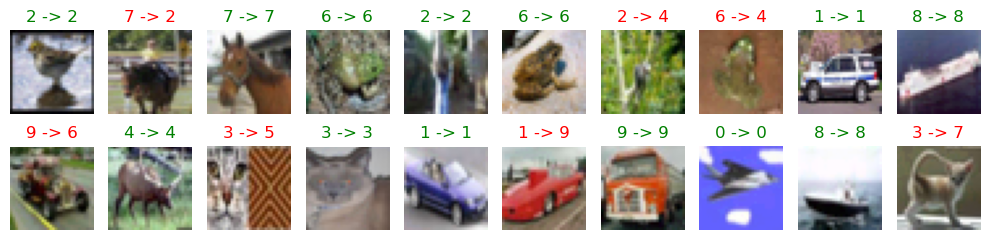

In [16]:
noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=4/255, alpha=2/255, num_iter=10)
adv_ex = X+noise
plot_images(adv_ex, y, model(adv_ex), 2, 10)

## Robust SparseResNet

In [17]:
model = SparseResNet().to(device)
model.load_state_dict(torch.load("../saved/sparse_resnet_robust_eps8.pt", map_location=device))

<All keys matched successfully>

**Predictions on clean pictures**

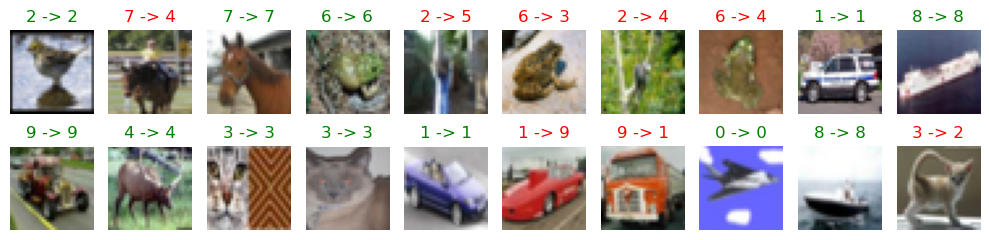

In [18]:
plot_images(X, y, model(X), 2, 10)

**Predictions on attacked images with PGD method**

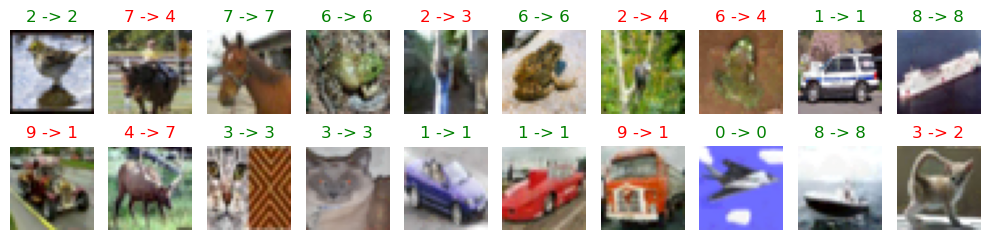

In [19]:
noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=8/255, alpha=2/255, num_iter=10)
adv_ex = X+noise
plot_images(adv_ex, y, model(adv_ex), 2, 10)

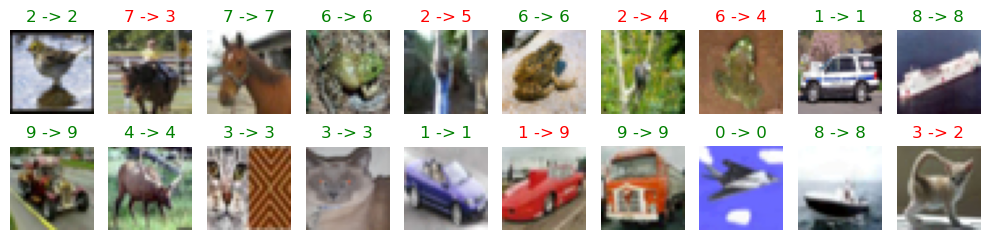

In [20]:
noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=4/255, alpha=2/255, num_iter=10)
adv_ex = X+noise
plot_images(adv_ex, y, model(adv_ex), 2, 10)